In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
heart_df['FastingBS'].unique()

array([0, 1], dtype=int64)

In [6]:
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

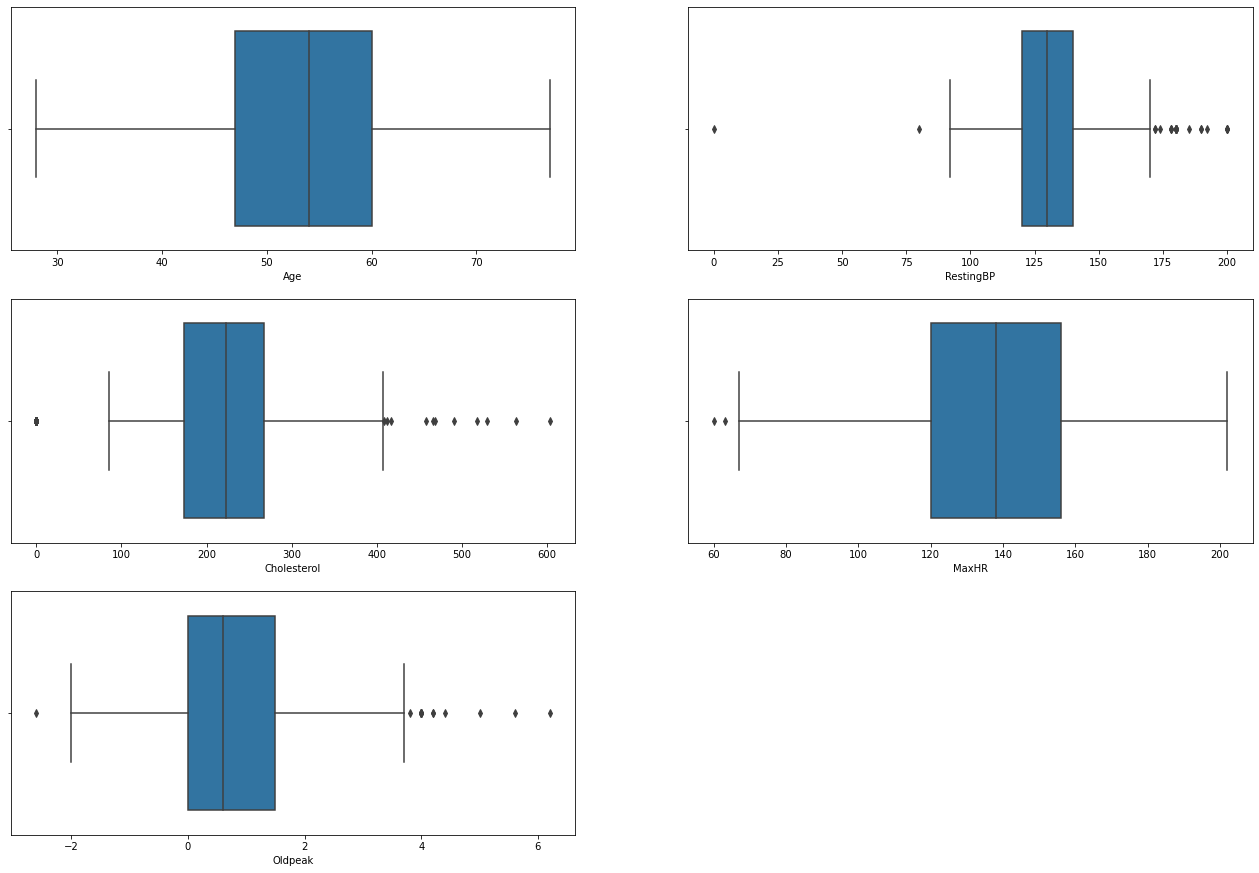

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
c = 1
plt.figure()
for i in num_cols:
    plt.subplot(3,2,c)
    sns.boxplot(x = i, data = heart_df)
    c += 1
plt.subplots_adjust(right = 3,top = 3)
plt.show()

In [8]:
cat_cols = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

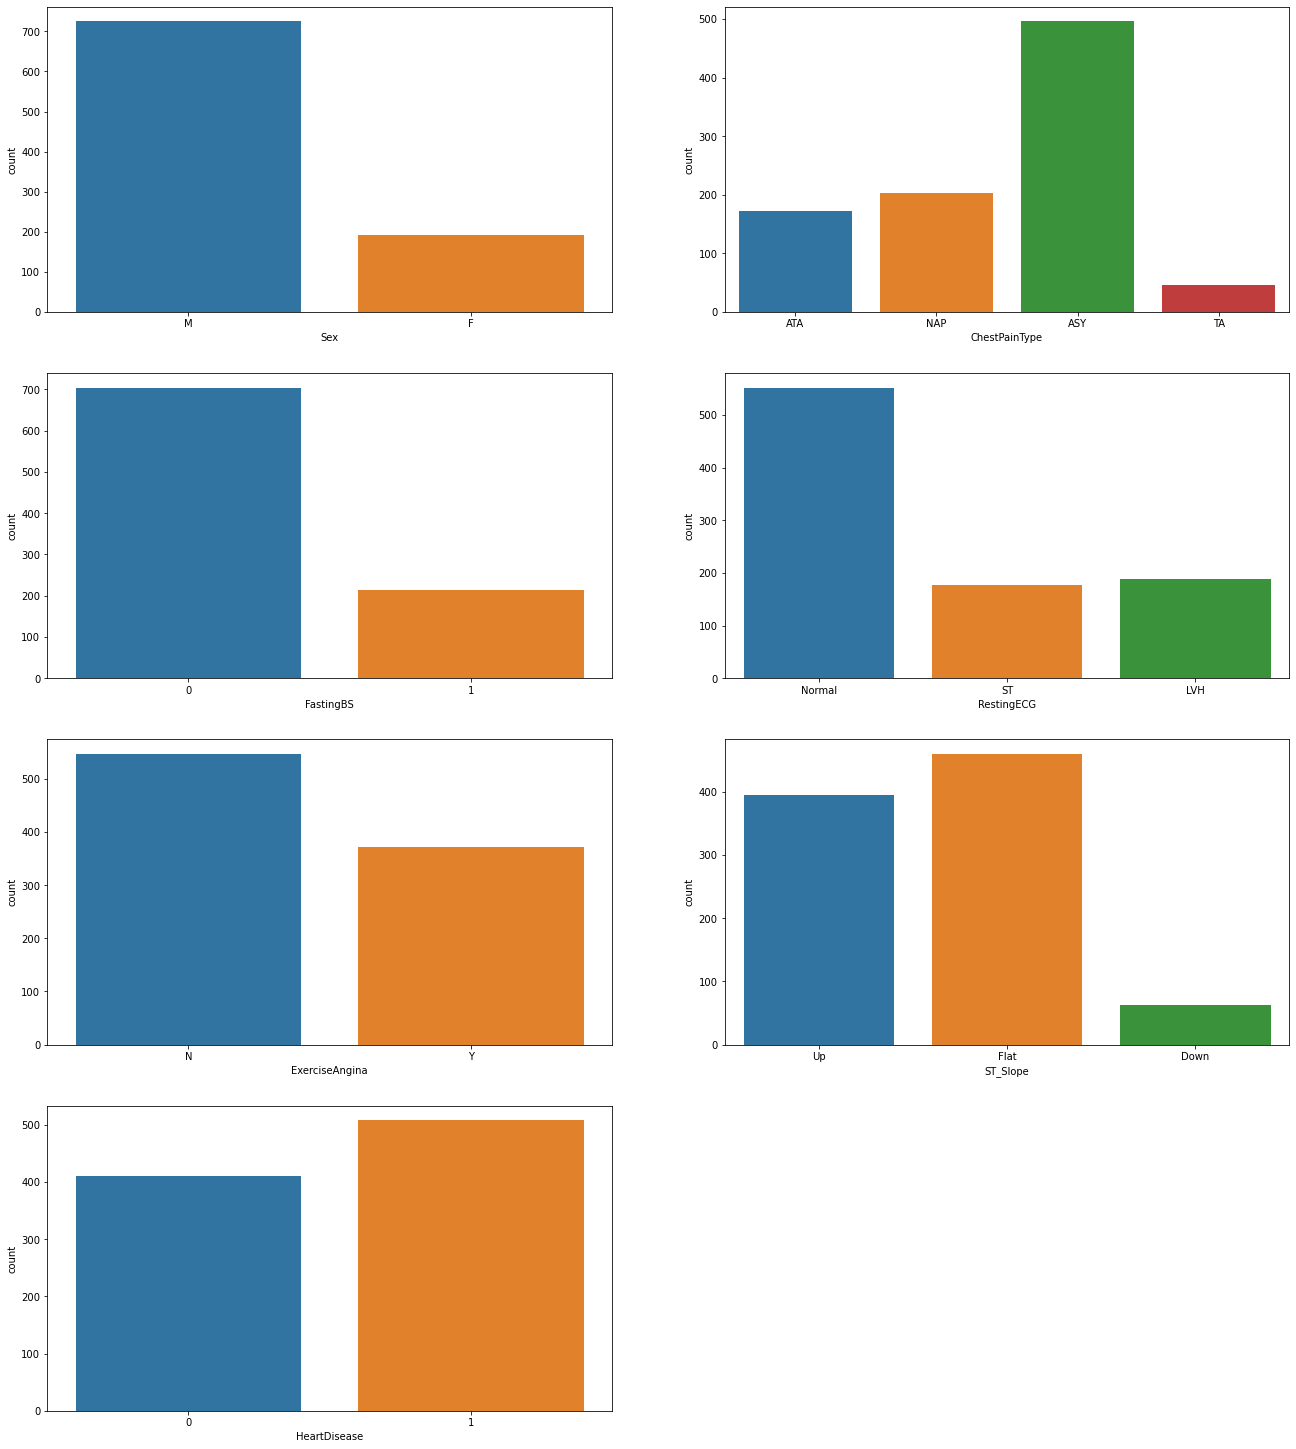

In [9]:
c = 1
plt.figure()
for i in cat_cols:
    plt.subplot(4,2,c)
    sns.countplot(x = i, data = heart_df)
    c += 1
plt.subplots_adjust(right = 3,top = 5)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
enc_cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in enc_cols:
    heart_df[i] = le.fit_transform(heart_df[i])
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [11]:
from sklearn.model_selection import train_test_split
X = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
pipe = Pipeline([('scale',StandardScaler()),('svm',SVC(kernel = 'rbf'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('svm', SVC())])

In [13]:
print('Train Accuracy: {:.4f}'.format(pipe.score(X_train, y_train)*100))
print('Test Accuracy: {:.4f}'.format(pipe.score(X_test, y_test)*100))

Train Accuracy: 90.7357
Test Accuracy: 90.7609


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184

